<a href="https://colab.research.google.com/github/skyworld19/ds-school-advanced/blob/master/ML_10_KMeans_DBSCAN_LAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 비지도 학습, 군집(Clustering) - K Means

In [ ]:
# Dummy Data를 생성 (make_blobs)

from sklearn.datasets import make_blobs # Clustering을 위한 데이터 생성

# n_samples=100 > 데이터의 개수 (행)  
# n_features=2 > 독립변수(특징)의 개수 (열)
# centers=3 > 클러스터의 개수 (라벨, Y)
# cluster_std=0.5 > 클러스터의 표준 편차  > 클러스터간의 거리 
# random_state=0 사용

X, y = make_blobs(n_samples=100, n_features=2, centers=3, cluster_std=0.5, random_state=0)
X.shape, y.shape

((100, 2), (100,))

In [ ]:
Y # 정답값 (실제 클러스터링을 통한 분류가 정확하게 됬는지 확인하기 위해서 사용)

array([1, 0, 1, 0, 0, 0, 2, 2, 1, 0, 0, 0, 1, 0, 2, 1, 2, 0, 2, 2, 2, 2,
       2, 0, 1, 1, 1, 1, 2, 2, 0, 1, 1, 0, 2, 2, 0, 1, 1, 2, 2, 1, 1, 0,
       0, 0, 1, 1, 2, 2, 2, 1, 0, 1, 2, 2, 1, 1, 0, 1, 1, 2, 2, 2, 2, 1,
       0, 2, 1, 0, 2, 0, 0, 1, 1, 0, 0, 0, 2, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 2, 2, 2, 2, 0, 0, 2, 2])

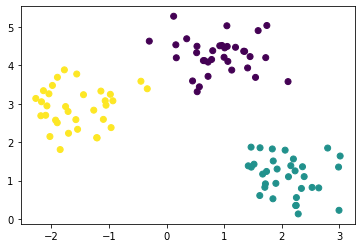

In [ ]:
import matplotlib.pyplot as plt
# 특징값을 가지고 시각화 (색상을 클러스터로 지정)
plt.scatter(X[:, 0], X[:, 1], c=y) 
plt.show()

In [ ]:
from sklearn.cluster import KMeans # Kmeans Cluster Model, 비지도학습 > Y(x)

# n_clusters > 생성될 군집의 개수 (n_clusters=3 사용)
# 군집분석은 비지도학습이므로 fit() 에 Y값을 넣지 않음
model = 
model

KMeans(n_clusters=3)

In [ ]:
# 2가지 방법으로 데이터가 속해있는 군집(클러스터) 정보를 받아옴 (결과는 동일)

# 1. 속성값을 이용하는 경우
model.labels_ # labels > 데이터(인덱스 기준)가 속해있는 클러스터 번호를 받아옴
# fitting된 데이터의 라벨을 받아옴

# 2. 함수를 이용하는 경우 > predict() > 예측함수
pred = model.predict(X)
# new data의 라벨을 받아옴

# list comprehension을 사용해 a, b가 같은 경우는 item으로 만들지 않음


In [ ]:
# 군집의 중심은 model.cluster_centers_
centers = 
centers

array([[ 0.91471566,  4.26637114],
       [-1.55605149,  2.90230638],
       [ 2.09729671,  1.12471414]])

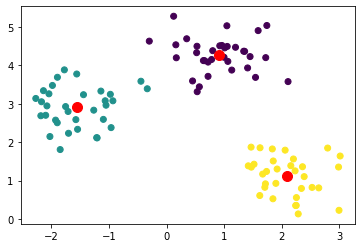

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=pred) # 색상을 예측값으로 변경
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100)
plt.show()

### K-means 클러스터링의 문제점

In [ ]:
# 클러스터링을 위한 dummy 데이터 생성 함수
from sklearn.datasets import make_moons 
# make_blobs > 선형
# make_moons > 비선형
X, Y = make_moons(200, noise=0.05, random_state=0)

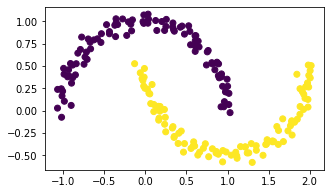

In [ ]:
plt.figure(figsize=(5, 3))
plt.scatter(X[:,0], X[:,1], c=Y)
plt.show()

In [ ]:
# Kmeans 모델에 X데이터를 fitting 시켜주세요.
# n_clusters를 무엇으로 해야할까요?
model = 

# 군집 결과를 X_pred에 저장해 주세요.
X_pred = 

In [ ]:
# 군집의 center 값을 centers에 저장해 주세요
centers = 
centers

array([[ 0.47943223,  2.80251253],
       [-1.26811733,  7.76378266]])

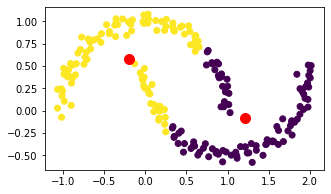

In [ ]:
# 예측결과를 시각화해주세요. (scatter 사용)
plt.figure(figsize=(5, 3))
plt.scatter(X[:,0], X[:,1], c=X_pred)
plt.scatter(centers[:,0], centers[:,1], c='red', s=100)
plt.show()

### DBSCAN(density-based spatial clustering of applications with noise)
- https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

- K-Means 군집의 경우 군집 간의 거리를 이용하기 때문에 선형적인 결정 경계를 가짐
    - DBSCAN의 경우 밀도 기반의 클러스터링으로 점들이 몰려 있어서 밀도가 높은 부분을
군집화하는 방식
    - 한 점을 기준으로 반경 거리(eps) 안에 점이 n개 이상 있으면 하나의 군집으로 인식
    - 해당 조건이 성립하지 않는 점의 경우 noise로 분류
- 클러스터의 개수를 미리 지정할 필요 없음
- 복잡한 형상도 찾을 수 있으며, 어떤 클래스에서 속하지 않는 포인트를 구분할 수 있음 
- 병합군집이나 K-Means 보다는 느리지만 비교적 큰 데이터셋에도 적용 가능

In [ ]:
# 클러스터링을 위한 dummy 데이터 생성 함수
from sklearn.datasets import make_moons 
X, Y = make_moons(200, noise=0.05, random_state=0)

In [ ]:
# moons > 비선형 (밀도기반의 클러스터링 > DBSCAN 적용) 
from sklearn.cluster import DBSCAN

dbscan = 
# model.fit_predict() 학습 및 예측을 진행 (반환값이 예측값)
X_pred = 
X_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

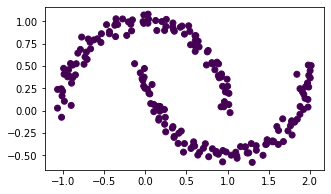

In [ ]:
plt.figure(figsize=(5,3))
plt.scatter(X[:,0], X[:,1], c=X_pred)
plt.show()

#### DBSCAN
- 모든 데이터가 하나의 군집으로 지정
    - min_samples 또는 eps 값의 조젃이 필요하지만 최우선적으로는 표준화를 적용
    - DBSCAN의 경우 밀도를 기반으로 하기 때문에 데이터 스케일에 영향이 있음
- 데이터의 값 범위가 0에서 1사이에서 0.1과 0에서100사이의 0.1은 차이가 있기 때문
- StandardScaler를 이용하여 데이터를 표준화

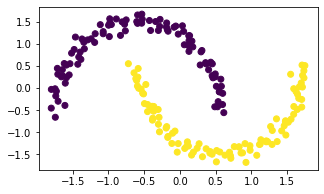

In [ ]:
from sklearn.preprocessing import StandardScaler # 스케일 적용

# X 데이터에 대해서 StandardScaler 적용 후, DBSCAN을 사용하여 학습 및 예측 진행
scaler = 
X_scaled = 

dbscan = 
X_pred = 

plt.figure(figsize=(5,3))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=X_pred)
plt.show()

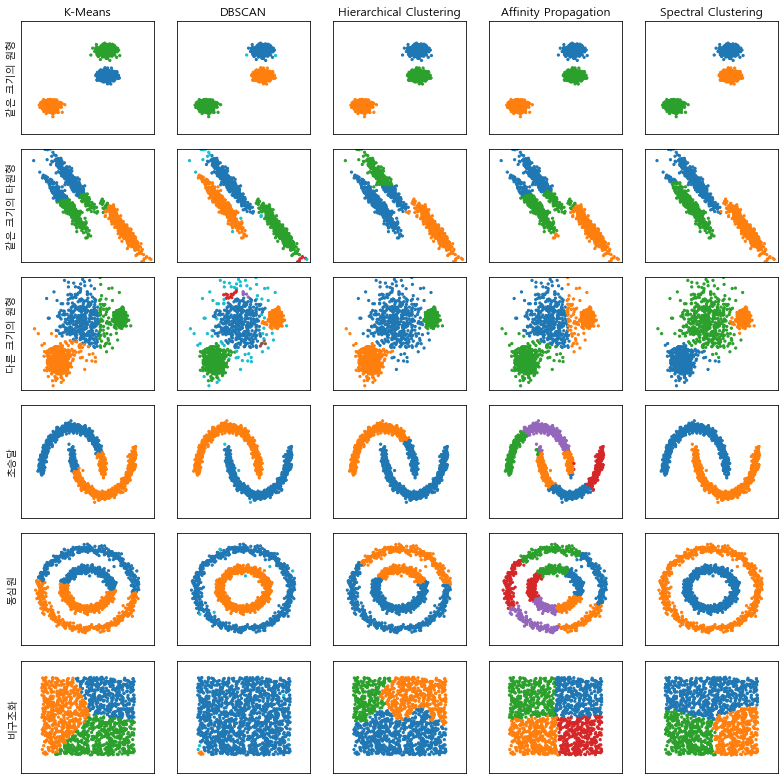

In [ ]:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html

from sklearn.datasets import *
from sklearn.cluster import *
from sklearn.preprocessing import StandardScaler
from sklearn.utils.testing import ignore_warnings

import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import platform
%matplotlib inline

# 한글깨지는 문제 해결 코드
path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...') 

np.random.seed(0)
n_samples = 1500
blobs = make_blobs(n_samples=n_samples, random_state=8)
X, y = make_blobs(n_samples=n_samples, random_state=170)
anisotropic = (np.dot(X, [[0.6, -0.6], [-0.4, 0.8]]), y)
varied = make_blobs(n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=170)
noisy_circles = make_circles(n_samples=n_samples, factor=.5, noise=.05)
noisy_moons = make_moons(n_samples=n_samples, noise=.05)
no_structure = np.random.rand(n_samples, 2), None
datasets = {
    "같은 크기의 원형": blobs, 
    "같은 크기의 타원형": anisotropic, 
    "다른 크기의 원형": varied, 
    "초승달": noisy_moons, 
    "동심원": noisy_circles, 
    "비구조화": no_structure
}

plt.figure(figsize=(11, 11))
plot_num = 1
for i, (data_name, (X, y)) in enumerate(datasets.items()):
    if data_name in ["초승달", "동심원"]:
        n_clusters = 2
    else:
        n_clusters = 3

    X = StandardScaler().fit_transform(X)

    two_means = MiniBatchKMeans(n_clusters=n_clusters)
    dbscan = DBSCAN(eps=0.15)
    spectral = SpectralClustering(n_clusters=n_clusters, affinity="nearest_neighbors")
    ward = AgglomerativeClustering(n_clusters=n_clusters)
    affinity_propagation = AffinityPropagation(damping=0.9, preference=-200)
    clustering_algorithms = (
        ('K-Means', two_means),
        ('DBSCAN', dbscan),
        ('Hierarchical Clustering', ward),
        ('Affinity Propagation', affinity_propagation),
        ('Spectral Clustering', spectral),
    )

    for j, (name, algorithm) in enumerate(clustering_algorithms):
        with ignore_warnings(category=UserWarning):
            algorithm.fit(X)
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(X)
        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i == 0:
            plt.title(name)
        if j == 0:
            plt.ylabel(data_name)
        colors = plt.cm.tab10(np.arange(20, dtype=int))
        plt.scatter(X[:, 0], X[:, 1], s=5, color=colors[y_pred])
        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plot_num += 1

plt.tight_layout()
plt.show()

### 군집 알고리즘 평가 - 정답값이 존재하는 경우

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import normalized_mutual_info_score

x, y = make_blobs(random_state=10)
labels = KMeans(n_clusters=3).fit_predict(x)

print('ACC :', accuracy_score(y, labels))
print('ARI :', adjusted_rand_score(y, labels))
print('NMI :', normalized_mutual_info_score(y, labels))

ACC : 0.33
ARI : 1.0
NMI : 1.0


### KMeans의 적정 K값 구하기


#### 이너샤(inertia) 사용
- 각 데이터와 가장 가까운 중심점 사이의 평균 제곱 거리를 이용하는 이너샤(inertia)를 사용하면 K값에 따른 이너샤의 변화를 확인할 수 있고 적정군집 수 K를 정의할 수 있음
- model.inertia_  에 값이 저장되어 있음

In [ ]:
from sklearn.datasets import load_iris
# iris 데이터셋을 불러와
# n_clusters를 2 ~ 14로 하는 model의 inertia_를 inertias 에 저장한다. 
iris = load_iris()
inertias = []

# code here


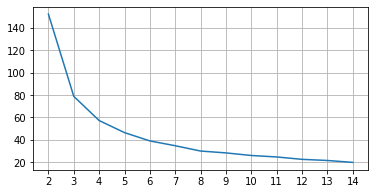

In [ ]:
plt.figure(figsize=(6, 3))
plt.plot(k_range, inertias)
plt.xticks(k_range)
plt.grid()
plt.show()

### 적정 K값 선정 및 평가방법
#### 실루엣 가중치 이용
- 한 클러스터 안에 데이터들이 다른 클러스터와 비교해서 얼마나 비슷한 지를 나타냄
    - 응집도와 분리도를 이용하여 계산
- 클러스터가 최적화되었다면 실루엣 가중치는 1에 가까운 숫자로 나옴
- 군집이 잘 되었는지 평가지표로도 사용함

In [ ]:
from sklearn.metrics import silhouette_score

k_range = range(2, 15)
scores = []

for k in k_range:
    model = KMeans(n_clusters=k).fit(iris['data'])
    scores.append(silhouette_score(iris['data'], model.labels_))

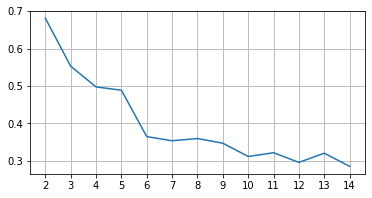

In [ ]:
plt.figure(figsize=(6, 3))
plt.plot(k_range, scores)
plt.xticks(k_range)
plt.grid()
plt.show()